In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
sal=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\SalaryData_Test.csv")
sal

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
sal_te=sal_t=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\SalaryData_Train.csv")
sal_te

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
sal.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
sal_te.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
sal.shape

(15060, 14)

In [7]:
sal_te.shape

(30161, 14)

In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
sal_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
sal.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
sal_te.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
sal.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [13]:
sal_te.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [14]:
lb = LabelEncoder()

In [15]:
sal["workclass"] = lb.fit_transform(sal["workclass"])
sal["education"] = lb.fit_transform(sal["education"])
sal["maritalstatus"] = lb.fit_transform(sal["maritalstatus"])
sal["occupation"] = lb.fit_transform(sal["occupation"])
sal["relationship"] = lb.fit_transform(sal["relationship"])
sal["race"] = lb.fit_transform(sal["race"])
sal["sex"] = lb.fit_transform(sal["sex"])
sal["native"] = lb.fit_transform(sal["native"])
sal["Salary"] = lb.fit_transform(sal["Salary"])

In [16]:
sal_te["workclass"] = lb.fit_transform(sal_te["workclass"])
sal_te["education"] = lb.fit_transform(sal_te["education"])
sal_te["maritalstatus"] = lb.fit_transform(sal_te["maritalstatus"])
sal_te["occupation"] = lb.fit_transform(sal_te["occupation"])
sal_te["relationship"] = lb.fit_transform(sal_te["relationship"])
sal_te["race"] = lb.fit_transform(sal_te["race"])
sal_te["sex"] = lb.fit_transform(sal_te["sex"])
sal_te["native"] = lb.fit_transform(sal_te["native"])
sal_te["Salary"] = lb.fit_transform(sal_te["Salary"])

In [17]:
sal = sal.iloc[: 4000, :]

In [18]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4000 non-null   int64
 1   workclass      4000 non-null   int32
 2   education      4000 non-null   int32
 3   educationno    4000 non-null   int64
 4   maritalstatus  4000 non-null   int32
 5   occupation     4000 non-null   int32
 6   relationship   4000 non-null   int32
 7   race           4000 non-null   int32
 8   sex            4000 non-null   int32
 9   capitalgain    4000 non-null   int64
 10  capitalloss    4000 non-null   int64
 11  hoursperweek   4000 non-null   int64
 12  native         4000 non-null   int32
 13  Salary         4000 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 297.0 KB


In [19]:
sal_te = sal_te.iloc[: 1500, :]

In [20]:
sal_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1500 non-null   int64
 1   workclass      1500 non-null   int32
 2   education      1500 non-null   int32
 3   educationno    1500 non-null   int64
 4   maritalstatus  1500 non-null   int32
 5   occupation     1500 non-null   int32
 6   relationship   1500 non-null   int32
 7   race           1500 non-null   int32
 8   sex            1500 non-null   int32
 9   capitalgain    1500 non-null   int64
 10  capitalloss    1500 non-null   int64
 11  hoursperweek   1500 non-null   int64
 12  native         1500 non-null   int32
 13  Salary         1500 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 111.5 KB


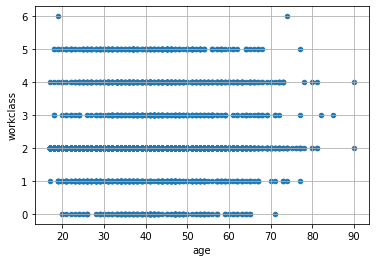

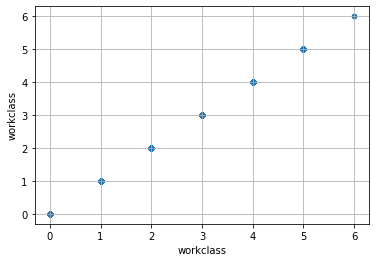

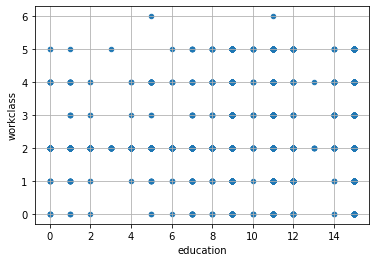

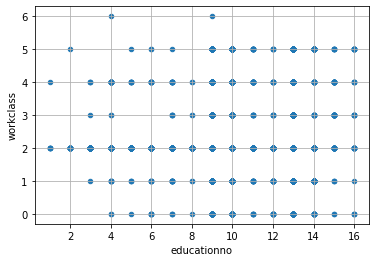

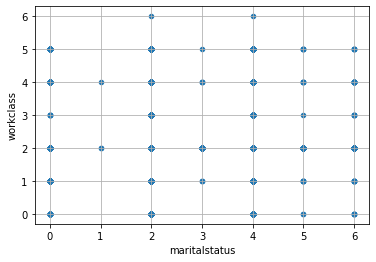

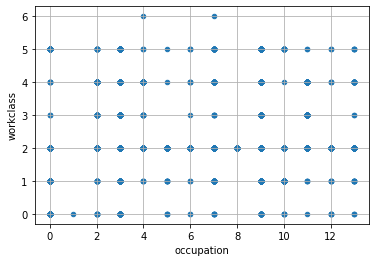

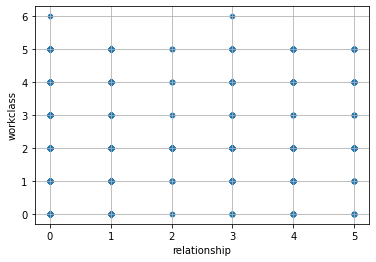

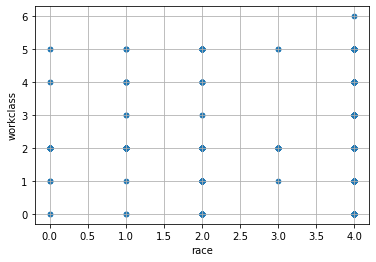

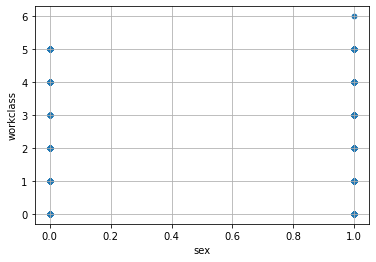

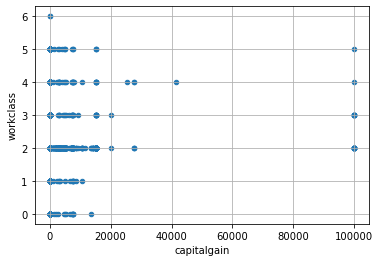

In [21]:
for i in sal.describe().columns[:-4]:
    sal.plot.scatter(i,'workclass',grid=True)

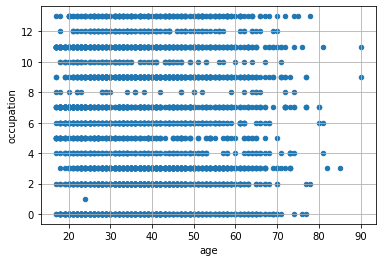

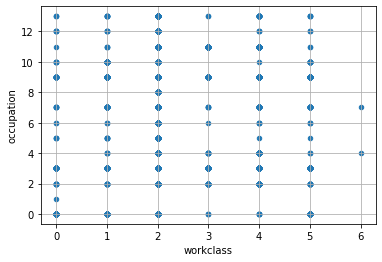

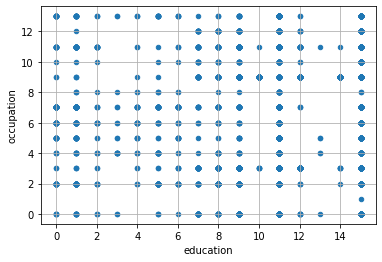

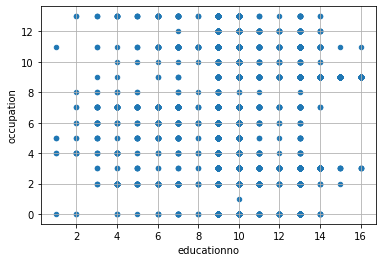

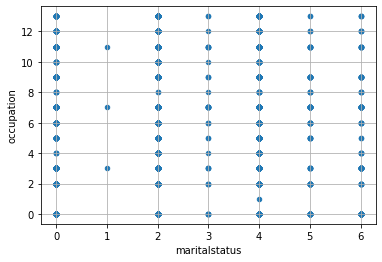

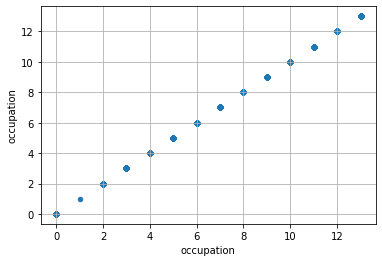

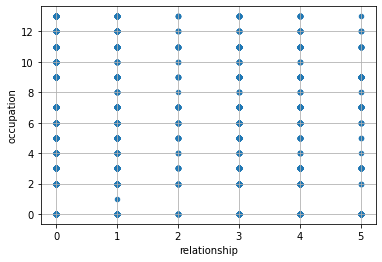

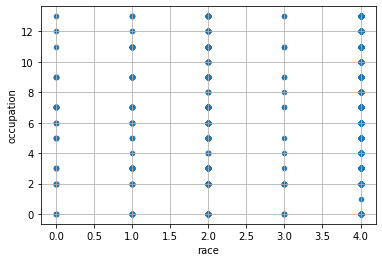

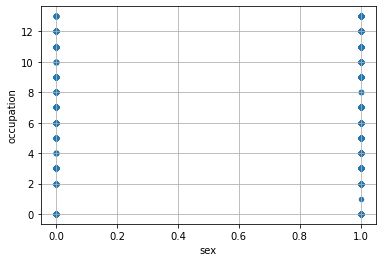

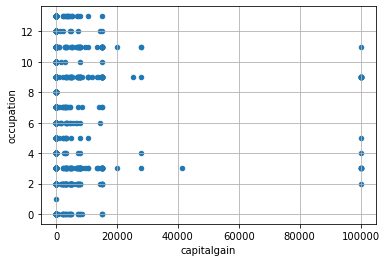

In [22]:
for i in sal.describe().columns[:-4]:
    sal.plot.scatter(i,'occupation',grid=True)

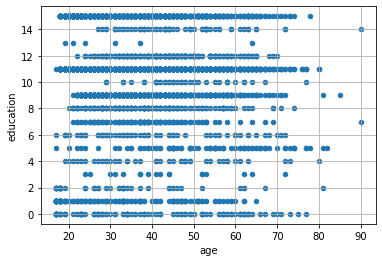

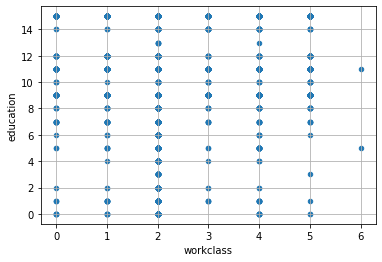

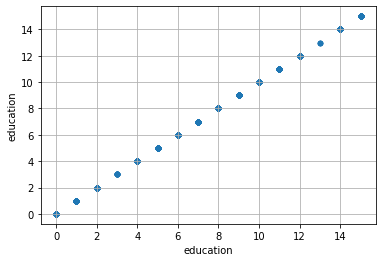

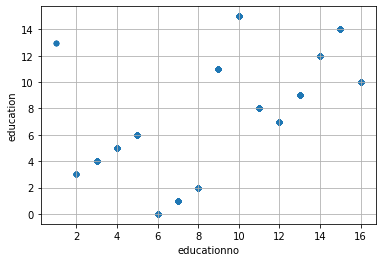

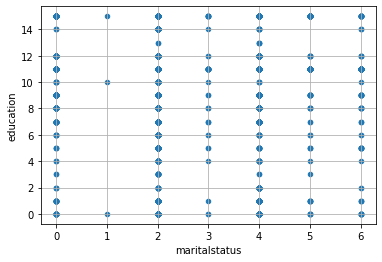

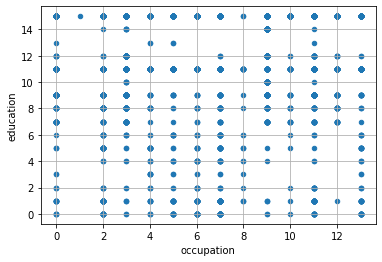

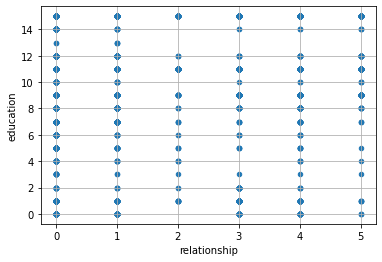

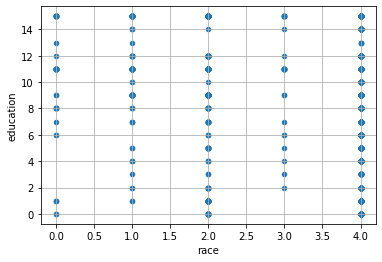

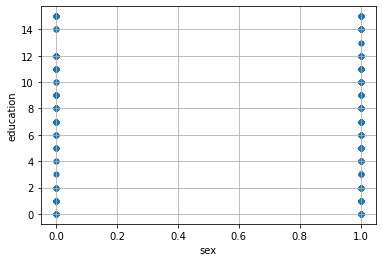

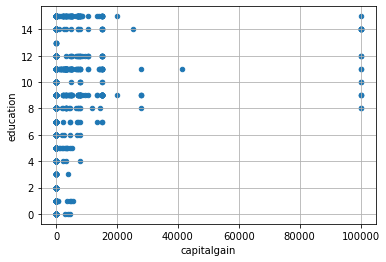

In [23]:
for i in sal.describe().columns[:-4]:
    sal.plot.scatter(i,'education',grid=True)

In [24]:
sal.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.085555,-0.049162,0.005827,-0.267196,-0.011169,-0.244523,0.025957,0.062427,0.084723,0.057536,0.112808,0.021013,0.234767
workclass,0.085555,1.000000,0.045535,0.064776,-0.022166,0.023560,-0.060262,0.042760,0.062839,0.036665,0.018535,0.069575,0.001321,0.032163
education,-0.049162,0.045535,1.000000,0.363956,-0.030346,-0.042365,-0.006080,0.015904,-0.028491,0.046448,0.032363,0.060688,0.087428,0.090153
educationno,0.005827,0.064776,0.363956,1.000000,-0.054146,0.094635,-0.062382,0.067770,0.001300,0.137717,0.091064,0.143416,0.109055,0.321281
maritalstatus,-0.267196,-0.022166,-0.030346,-0.054146,1.000000,-0.012827,0.185867,-0.054528,-0.120941,-0.037781,-0.019912,-0.154010,-0.016728,-0.192158
occupation,-0.011169,0.023560,-0.042365,0.094635,-0.012827,1.000000,-0.047523,0.008175,0.052939,0.016601,-0.016987,0.020498,0.001021,0.030669
relationship,-0.244523,-0.060262,-0.006080,-0.062382,0.185867,-0.047523,1.000000,-0.141201,-0.577025,-0.055716,-0.047248,-0.280992,-0.007268,-0.267270
race,0.025957,0.042760,0.015904,0.067770,-0.054528,0.008175,-0.141201,1.000000,0.083781,0.014085,0.040511,0.038197,0.110376,0.078316
sex,0.062427,0.062839,-0.028491,0.001300,-0.120941,0.052939,-0.577025,0.083781,1.000000,0.060384,0.062520,0.254610,-0.010144,0.213038
capitalgain,0.084723,0.036665,0.046448,0.137717,-0.037781,0.016601,-0.055716,0.014085,0.060384,1.000000,-0.032670,0.100292,0.025896,0.224438


In [25]:
sal_te.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.089040,-0.001193,0.030822,-0.263242,-0.004870,-0.228724,0.011576,0.071205,0.096294,0.067808,0.110937,-0.014864,0.236782
workclass,0.089040,1.000000,0.043083,0.070928,-0.056868,0.031438,-0.097960,0.084217,0.100382,0.023837,0.033013,0.033326,-0.013858,0.066353
education,-0.001193,0.043083,1.000000,0.305848,-0.058264,-0.034878,-0.043627,0.022801,-0.003860,0.028507,-0.004369,0.065294,0.088596,0.029421
educationno,0.030822,0.070928,0.305848,1.000000,-0.061904,0.120237,-0.104084,0.077400,0.030067,0.111316,0.062892,0.177956,0.058831,0.312355
maritalstatus,-0.263242,-0.056868,-0.058264,-0.061904,1.000000,0.078827,0.145848,-0.089289,-0.071039,-0.054021,-0.016095,-0.208803,0.009329,-0.199732
occupation,-0.004870,0.031438,-0.034878,0.120237,0.078827,1.000000,-0.049420,0.038385,0.058164,0.008996,0.013701,0.029108,0.004791,0.027503
relationship,-0.228724,-0.097960,-0.043627,-0.104084,0.145848,-0.049420,1.000000,-0.104173,-0.565989,-0.087010,-0.027873,-0.264164,-0.059206,-0.214725
race,0.011576,0.084217,0.022801,0.077400,-0.089289,0.038385,-0.104173,1.000000,0.080071,0.006071,0.036176,0.063138,0.138337,0.083410
sex,0.071205,0.100382,-0.003860,0.030067,-0.071039,0.058164,-0.565989,0.080071,1.000000,0.054472,0.039503,0.206496,0.025731,0.186257
capitalgain,0.096294,0.023837,0.028507,0.111316,-0.054021,0.008996,-0.087010,0.006071,0.054472,1.000000,-0.034024,0.082850,0.003255,0.213706


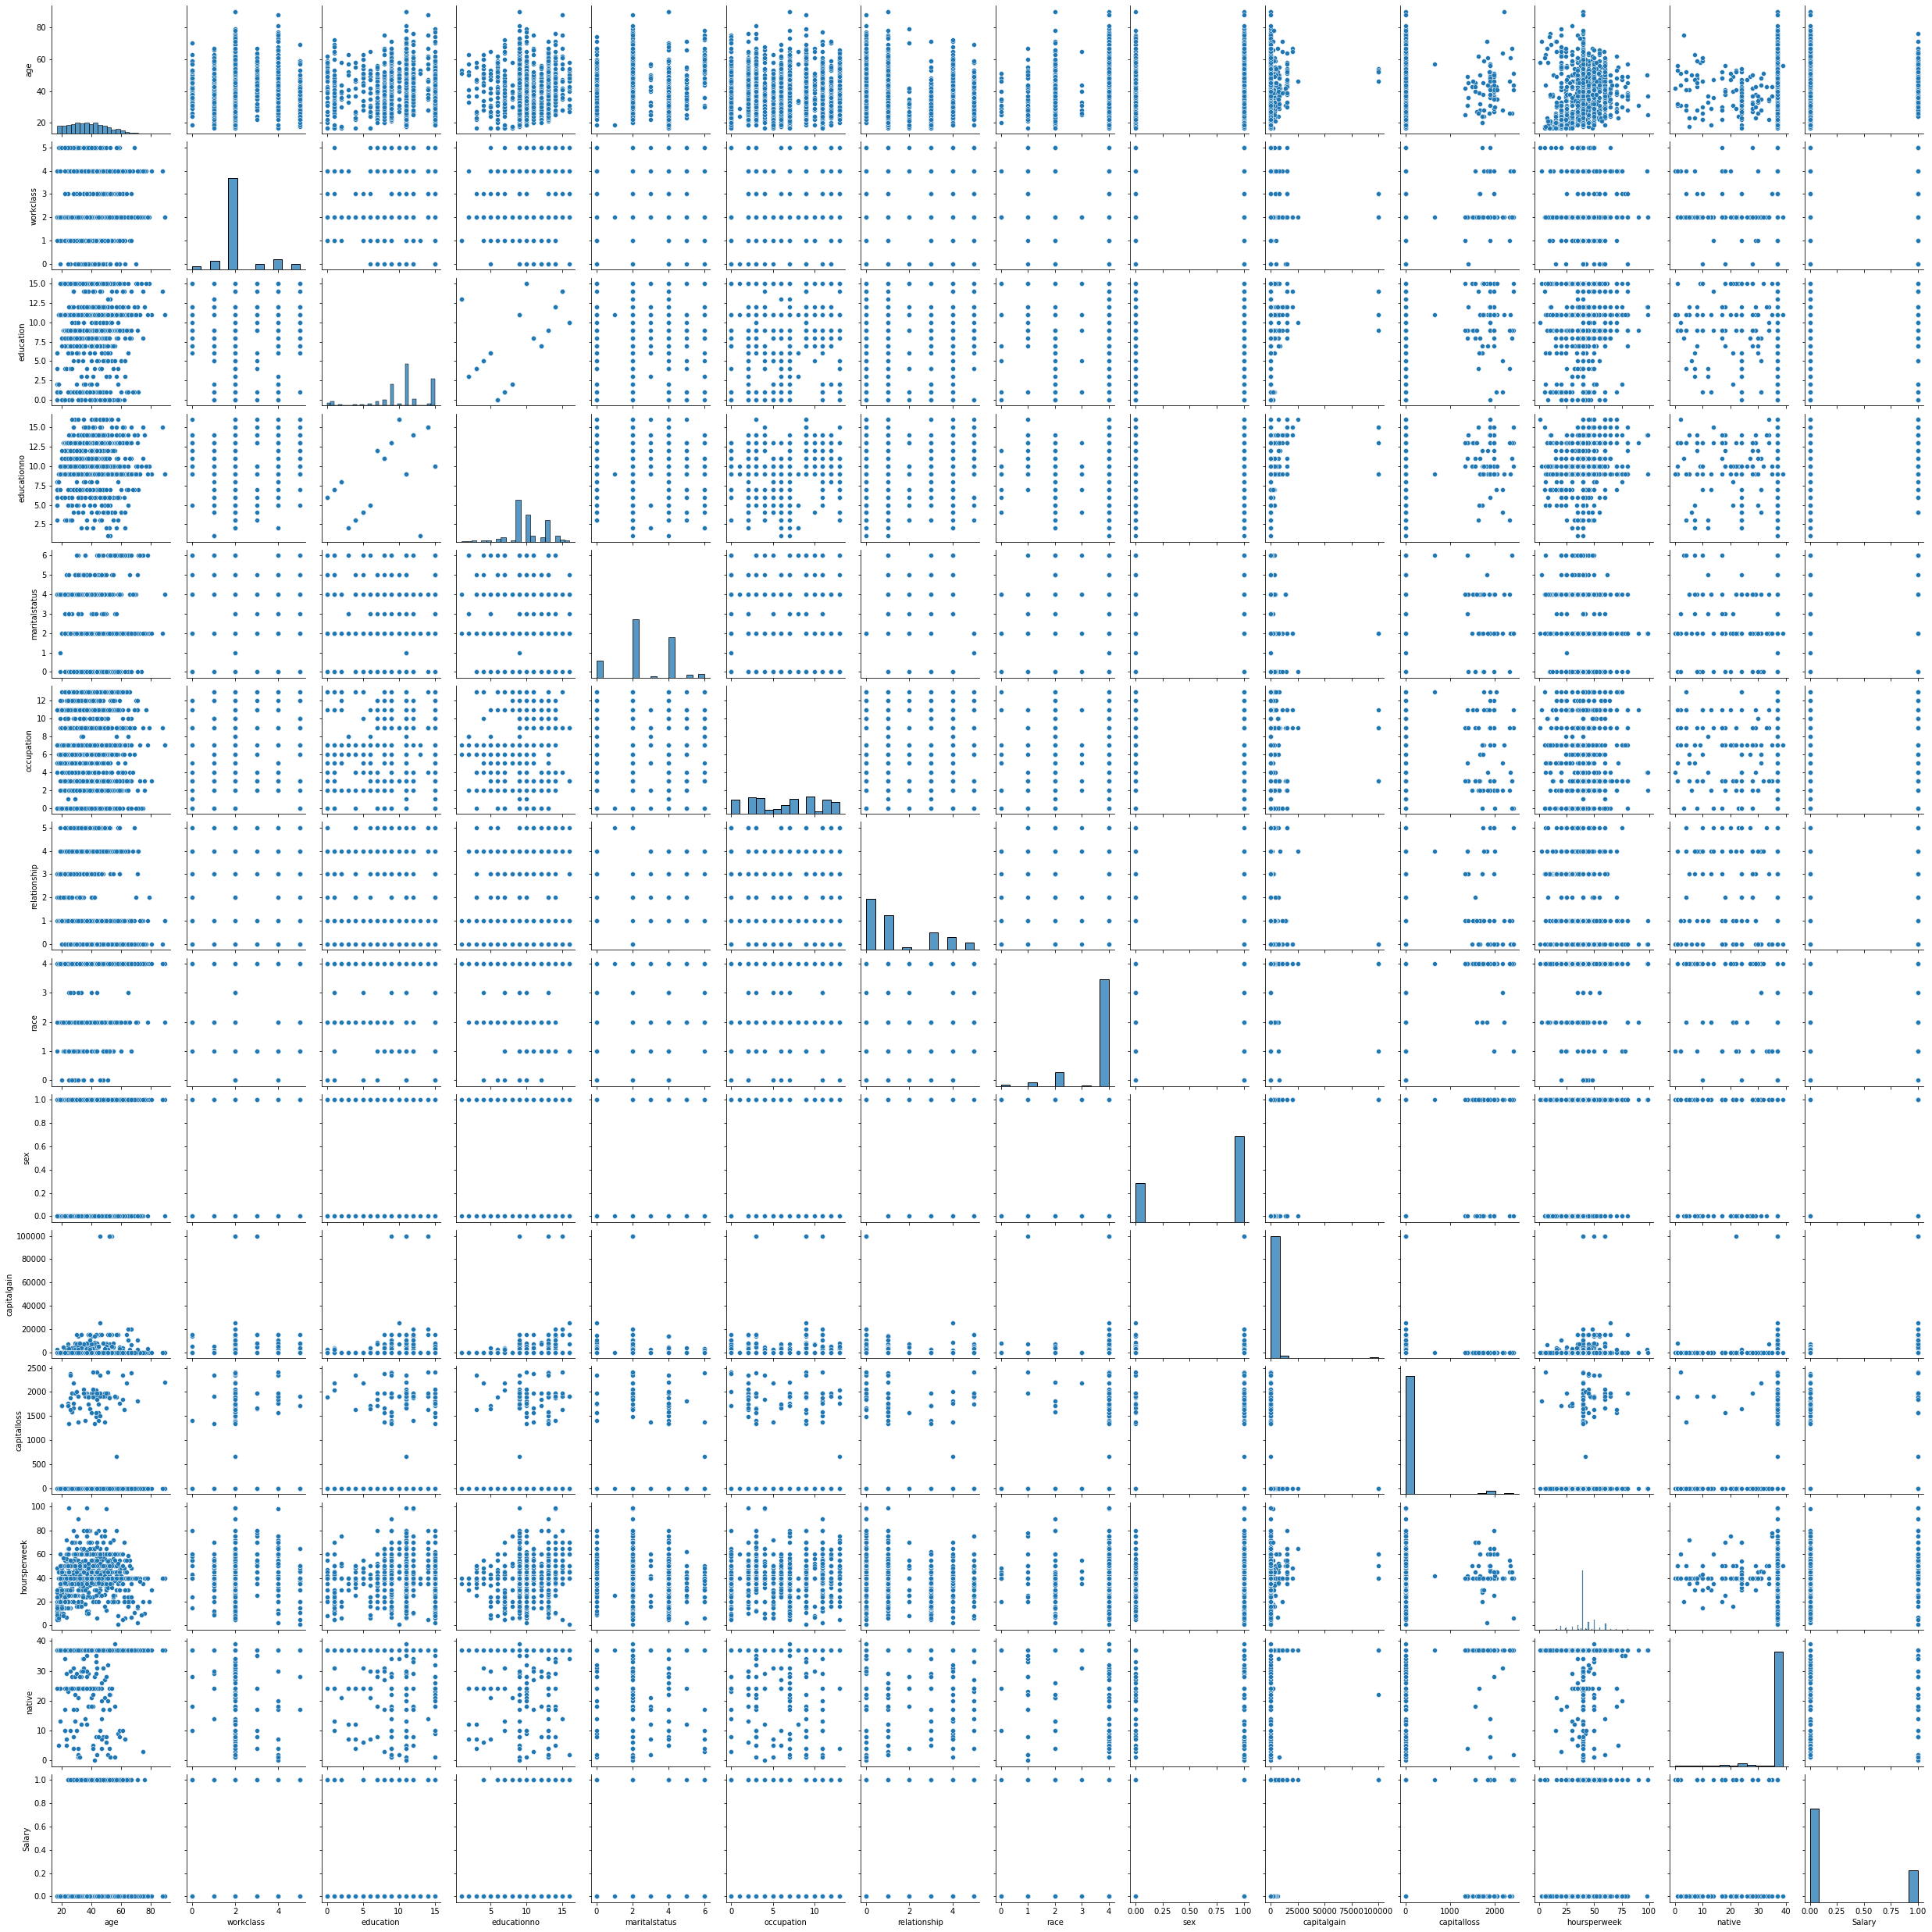

In [26]:
sns.pairplot(sal_te)

In [27]:
X_train=sal.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,47,0,7,12,2,5,0,1,1,0,0,40,28
3996,37,1,12,14,2,9,5,4,0,0,0,50,37
3997,25,2,9,13,4,3,3,4,1,0,0,40,37
3998,41,2,8,11,2,2,0,4,1,0,0,45,37


In [28]:
y_train=sal.iloc[:,-1]
y_train

0       0
1       0
2       1
3       1
4       0
       ..
3995    1
3996    1
3997    0
3998    1
3999    0
Name: Salary, Length: 4000, dtype: int32

In [29]:
X_test=sal_te.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,39,2,1,7,2,7,0,4,1,2407,0,70,24
1496,67,1,11,9,0,7,1,4,0,0,0,24,37
1497,40,5,7,12,2,0,0,4,1,0,0,40,37
1498,27,2,4,3,4,4,1,4,1,0,0,35,24


In [30]:
y_test = sal_te.iloc[:,-1]
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    1
1498    0
1499    0
Name: Salary, Length: 1500, dtype: int32

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 13), (4000,), (1500, 13), (1500,))

In [32]:
model = SVC()

model.fit(X_train, y_train)

SVC()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(confusion_matrix(y_test, y_pred))

[[1079   42]
 [ 280   99]]


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1121
           1       0.70      0.26      0.38       379

    accuracy                           0.79      1500
   macro avg       0.75      0.61      0.63      1500
weighted avg       0.77      0.79      0.75      1500



In [36]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [37]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [38]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.756 total time=   2.7s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.754 total time=   2.4s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.761 total time=   2.2s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.757 total time=   2.2s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   2.2s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.762 total time=   2.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.757 total time=   2.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.761 total time=   2.3s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.766 total time=   2.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.769 total time=   2.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.829 total time=   1.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 2/5] END .........C=20, gamma=1, kernel=rbf;, score=0.755 total time=   3.7s
[CV 3/5] END .........C=20, gamma=1, kernel=rbf;, score=0.765 total time=   2.6s
[CV 4/5] END .........C=20, gamma=1, kernel=rbf;, score=0.760 total time=   2.6s
[CV 5/5] END .........C=20, gamma=1, kernel=rbf;, score=0.757 total time=   2.7s
[CV 1/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.760 total time=   2.1s
[CV 2/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.743 total time=   3.3s
[CV 3/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.746 total time=   2.3s
[CV 4/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.755 total time=   2.4s
[CV 5/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.739 total time=   3.0s
[CV 1/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.812 total time=   1.5s
[CV 2/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.791 total time=   1.4s
[CV 3/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.810 total time=   1.6s
[CV 4/5] END ......C=20, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_params_

{'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
grid_pred = grid.predict(X_test)

In [41]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(confusion_matrix(y_test, grid_pred))

[[1087   34]
 [ 229  150]]


In [43]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1121
           1       0.82      0.40      0.53       379

    accuracy                           0.82      1500
   macro avg       0.82      0.68      0.71      1500
weighted avg       0.82      0.82      0.80      1500

